## Revenue Growth Prediction

**AIM**: Develop a predictive model to forecast monthly revenue growth for a UK-based online fashion retailer using historical sales data.

In [0]:
!pip install ucimlrepo

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-63a5e5cb-ad68-4cd4-978f-f4ca89ef0698/bin/python -m pip install --upgrade pip' command.


### Import Libraries and Data

In [0]:
import random

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

#set visualization params
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [0]:
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# data (as pandas dataframes) 
retails_df = online_retail.data.features
retails_df.loc[:, 'InvoiceNo'] = pd.Series(online_retail['data']['ids']['InvoiceNo'])
retails_df.loc[:, 'StockCode'] = pd.Series(online_retail['data']['ids']['StockCode'])

retails_df.shape

Out[3]: (541909, 8)

In [0]:
retails_df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,536365,85123A
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,71053
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,536365,84406B
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,84029G
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,536365,84029E
...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,581587,22613
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,581587,22899
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,581587,23254
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,581587,23255


### Intital Data Exploration

Initial Data Exploration including, getting to know about the feature data types, descriptive Stats, basic data type convertions, duplicates analysis, missing value analysis and imputation.

In [0]:
retails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
 6   InvoiceNo    541909 non-null  object 
 7   StockCode    541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [0]:
#Descriptive Statistics
retails_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


We need to convert Invoice Date to Datetime format.

In [0]:
#Unique values
for i in ['Country', 'Description', 'CustomerID']:
    print(f"Unique Values in {i}: ", retails_df[i].nunique())

Unique Values in Country:  38
Unique Values in Description:  4223
Unique Values in CustomerID:  4372


In [0]:
#convert date to datetime
retails_df['InvoiceDate'] = pd.to_datetime(retails_df['InvoiceDate'], 
                                           format='%m/%d/%Y %H:%M')

retails_df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365,85123A
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,71053
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,536365,84406B
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,84029G
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,84029E


In [0]:
print ("Rows     : " ,retails_df.shape[0])
print ("Columns  : " ,retails_df.shape[1])
print ("\nFeatures : \n" ,retails_df.columns.tolist())
print ("\nMissing values :  ", retails_df.isnull().any())
print ("\nUnique values :  \n",retails_df.nunique())

Rows     :  541909
Columns  :  8

Features : 
 ['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'InvoiceNo', 'StockCode']

Missing values :   Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
InvoiceNo      False
StockCode      False
dtype: bool

Unique values :  
 Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
InvoiceNo      25900
StockCode       4070
dtype: int64


In [0]:
retails_df[retails_df.duplicated()]

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
517,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,536409,21866
527,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,536409,22866
537,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,536409,22900
539,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,536409,22111
555,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,536412,22327
...,...,...,...,...,...,...,...,...
541675,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom,581538,22068
541689,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,581538,23318
541692,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,581538,22992
541699,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,581538,22694


In [0]:
#remove duplicates
retails_df = retails_df.drop_duplicates(keep='first').reset_index(drop=True)

#### Analyse Missing Values

Detect the null values,  remove, impute the missing values using appropriate methods.

In [0]:
#% of null values
missing_pct = retails_df.isnull().sum()/len(retails_df) * 100

missing_pct

Out[138]: Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
InvoiceNo       0.000000
StockCode       0.000000
dtype: float64

From the above, we can see that all the Column contains Missing Values. We need to find some way to impute them in future.

Customer ID has the most of missing values, 25%...

In [0]:
retails_df[retails_df['CustomerID'].isna()]

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
605,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,536414,22139
1407,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,536544,21773
1408,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,536544,21774
1409,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,536544,21786
1410,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,536544,21787
...,...,...,...,...,...,...,...,...
536275,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,581498,85099B
536276,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,581498,85099C
536277,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,581498,85150
536278,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,581498,85174


In [0]:
#drop rows with more than 3 non null
retails_df = retails_df.dropna( 
                               subset=['Quantity', 'Description', 
                                       'InvoiceDate', 'UnitPrice'], 
                               thresh=3
                               ).reset_index(drop=True)
                               
retails_df.isnull().sum()/len(retails_df) * 100                            

Out[140]: Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
InvoiceNo       0.000000
StockCode       0.000000
dtype: float64

We might be able to fix missing values in Description using the Stock Code

##### Impute Descriptions

Assumption: Similar items have similar Stock codes.

Method: Get the Stock Code - Description mapping, and impute the description using the stock code whereever missing.

In [0]:
retails_df.query("StockCode=='71053'")

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,71053
50,WHITE METAL LANTERN,6,2010-12-01 09:02:00,3.39,17850.0,United Kingdom,536373,71053
67,WHITE METAL LANTERN,6,2010-12-01 09:32:00,3.39,17850.0,United Kingdom,536375,71053
279,WHITE METAL LANTERN,6,2010-12-01 10:51:00,3.39,17850.0,United Kingdom,536396,71053
417,WHITE METAL LANTERN,8,2010-12-01 11:33:00,3.39,17850.0,United Kingdom,536406,71053
...,...,...,...,...,...,...,...,...
528490,WHITE MOROCCAN METAL LANTERN,4,2011-12-07 11:43:00,3.75,18219.0,United Kingdom,581099,71053
529331,WHITE MOROCCAN METAL LANTERN,1,2011-12-07 14:12:00,3.75,15471.0,United Kingdom,581149,71053
531508,WHITE MOROCCAN METAL LANTERN,1,2011-12-08 09:28:00,8.29,NaN,United Kingdom,581219,71053
534041,WHITE MOROCCAN METAL LANTERN,1,2011-12-08 16:30:00,8.29,NaN,United Kingdom,581439,71053


seems like different items with slight variations have same Stock Code.

In [0]:
desc_missed_df = retails_df.query('Description!=Description')

desc_missed_df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
605,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,536414,22139
1934,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,536545,21134
1935,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,536546,22145
1936,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,536547,37509
1951,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,536549,85226A


In [0]:
#Groupby StockCode
code_desc_mapping = retails_df.groupby('StockCode')['Description'].apply(set).reset_index()

code_desc_mapping

,StockCode,Description
0,10002,"{nan, INFLATABLE POLITICAL GLOBE }"
1,10080,"{nan, check, GROOVY CACTUS INFLATABLE}"
2,10120,{DOGGY RUBBER}
3,10123C,"{nan, HEARTS WRAPPING TAPE }"
4,10123G,{nan}
...,...,...
4065,gift_0001_20,"{Dotcomgiftshop Gift Voucher £20.00, to push o..."
4066,gift_0001_30,"{nan, Dotcomgiftshop Gift Voucher £30.00}"
4067,gift_0001_40,{Dotcomgiftshop Gift Voucher £40.00}
4068,gift_0001_50,{Dotcomgiftshop Gift Voucher £50.00}


In [0]:
#Find mapping for missing items
missing_stock_id = set(desc_missed_df['StockCode'])

code_desc_mapping[code_desc_mapping['StockCode'].isin(missing_stock_id)]

,StockCode,Description
0,10002,"{nan, INFLATABLE POLITICAL GLOBE }"
1,10080,"{nan, check, GROOVY CACTUS INFLATABLE}"
3,10123C,"{nan, HEARTS WRAPPING TAPE }"
4,10123G,{nan}
9,10134,{nan}
...,...,...
4055,DCGS0074,{nan}
4059,DOT,"{nan, DOTCOM POSTAGE}"
4062,POST,"{POSTAGE, nan}"
4064,gift_0001_10,"{nan, Dotcomgiftshop Gift Voucher £10.00}"


A lot of items are there which has ambiguos Stock Code. Lets remove items with ambigous Stock Code.

In [0]:
#remove entires with ambiguos mapping
amb_code = code_desc_mapping[~code_desc_mapping['StockCode'].apply(
    lambda x: True if 4 < len(x) < 7 else False)
                             ]['StockCode']     #remove items with code length 4<x<7

retails_df = retails_df[~retails_df['StockCode'].isin(amb_code)]

retails_df.isnull().sum()/len(retails_df) * 100                            

Out[145]: Description     0.269849
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.103795
Country         0.000000
InvoiceNo       0.000000
StockCode       0.000000
dtype: float64

In [0]:
#impute missing Description
desc_missed_dict = dict(zip(code_desc_mapping['StockCode'], code_desc_mapping['Description']))

desc_missed_dict = {k: [i for i in list(desc_missed_dict[k] - {np.nan}) if i.isupper()]
                     for k in desc_missed_dict
                     }  # remove small letters values 

desc_missed_dict = {k: desc_missed_dict[k][0]
                    if len(desc_missed_dict[k])>0 
                    else "Missed Item"
                    for k in desc_missed_dict 
                    }

retails_df['Description'] = retails_df['Description'].fillna(retails_df['StockCode'].map(desc_missed_dict))

retails_df.isnull().sum()/len(retails_df) * 100                            

Out[146]: Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.103795
Country         0.000000
InvoiceNo       0.000000
StockCode       0.000000
dtype: float64

In [0]:
#sample imputed
retails_df.iloc[622]

Out[147]: Description    CHRISTMAS GINGHAM TREE
Quantity                            5
InvoiceDate       2010-12-01 11:57:00
UnitPrice                        0.85
CustomerID                    12838.0
Country                United Kingdom
InvoiceNo                      536415
StockCode                       22594
Name: 627, dtype: object

##### Impute Customer ID
Assumption: Similar Invoice ID belongs to same customer.

method: find the missing entrieas for customer ID, Check if there is any other entry which correspponds to that invoice id. If yes, check if thst entry has a Customer ID, then impute using that, else create a random customer Id for that missing Entry. 

In [0]:
retails_df.shape

Out[148]: (533262, 8)

In [0]:
retails_df.query('CustomerID!=CustomerID')

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
605,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,536414,22139
1407,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,536544,21773
1408,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,536544,21774
1409,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,536544,21786
1410,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,536544,21787
...,...,...,...,...,...,...,...,...
536274,SCANDINAVIAN REDS RIBBONS,4,2011-12-09 10:26:00,3.29,NaN,United Kingdom,581498,85049e
536275,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,581498,85099B
536276,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,581498,85099C
536277,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,581498,85150


In [0]:
#Same invoice no in misssing mustomer ID
missing_cust_inv = retails_df.query('CustomerID!=CustomerID')['InvoiceNo'].value_counts().reset_index()
missing_cust_inv.columns = ['InvoiceNo', 'Count']
missing_cust_inv = missing_cust_inv.query('Count>=10')

missing_cust_inv

,InvoiceNo,Count
0,573585,1111
1,581219,747
2,581492,730
3,580729,720
4,558475,704
...,...,...
913,539074,10
914,564365,10
915,560050,10
916,536920,10


We might be able to impute a unique customer id based on the invoice. Same invoice numbers get same customer ?ids

In [0]:
#Create unique ids for imputatiom
taken_ids = set(retails_df['CustomerID'].dropna().astype('int'))

def create_uids(x):
    while True:
        id_ = random.randint(11111, 99999)
        if id_ not in taken_ids:
            taken_ids.add(id_)
            break

    return id_

missing_cust_inv['CustomerID'] = missing_cust_inv['InvoiceNo'].apply(create_uids)

missing_cust_inv

,InvoiceNo,Count,CustomerID
0,573585,1111,65754
1,581219,747,56663
2,581492,730,75968
3,580729,720,34042
4,558475,704,20742
...,...,...,...
913,539074,10,28410
914,564365,10,96557
915,560050,10,42603
916,536920,10,87831


In [0]:
#impute Customer ID
cust_inv_mapping = dict(zip(missing_cust_inv['InvoiceNo'], missing_cust_inv['CustomerID']))

retails_df['CustomerID'] = retails_df['CustomerID'].fillna(
                                    retails_df['InvoiceNo'].map(cust_inv_mapping)
                                    )

#Drop further Nulls
retails_df = retails_df.dropna().reset_index(drop=True)

print("Shape: ", retails_df.shape, '\n')

retails_df.isnull().sum()/len(retails_df) * 100                            

Shape:  (529798, 8) 

Out[155]: Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
InvoiceNo      0.0
StockCode      0.0
dtype: float64

### Exploratory Analysis


#### Descriptive Analysis

In [0]:
retails_df.describe()

,Quantity,UnitPrice,CustomerID
count,529798.000000,529798.000000,529798.000000
mean,10.004375,3.286689,25668.312630
std,217.976238,4.513430,21942.334682
min,-80995.000000,0.000000,11122.000000
25%,1.000000,1.250000,14298.000000
50%,3.000000,2.080000,16170.000000
75%,10.000000,4.130000,18173.000000
max,80995.000000,649.500000,99947.000000


**Quantity**
* Why does quantity have negative values?
* Seems like outliers in Quantity. And The outlier seems to be the opposites. 80995

**Unit Price**
* Why is min value 0?
* Check the max unit price item..

##### Quantity Column

In [0]:
#Analyse Quantity < 0
retails_df.query('Quantity<0')

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
151,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,C536383,35004C
232,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,C536391,22556
233,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,C536391,21984
234,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,C536391,21983
235,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,C536391,21980
...,...,...,...,...,...,...,...,...
528354,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,C581490,22178
528355,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,C581490,23144
529607,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,C581568,21258
529608,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,C581569,84978


Seems like, these items are Cancelle items, Invoice No starts with "C".

In [0]:
#Min Quantity
retails_df.query(f"Quantity=={min(retails_df['Quantity'])}")

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
528328,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,C581484,23843


In [0]:
#Max Quantity
retails_df.query(f"Quantity=={max(retails_df['Quantity'])}")

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
528327,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,581483,23843


In [0]:
#remove Cancelled Items
cancelled_df = retails_df.query('Quantity<0')
retails_df = retails_df.drop( 
                             cancelled_df.index
                             ).reset_index(drop=True)

retails_df.shape

Out[31]: (521195, 8)

In [0]:
#Outlier in Quantity
retails_df.query(f"Quantity=={max(retails_df['Quantity'])}")

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
519730,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,581483,23843


##### Unit Price Column

In [0]:
#Analyse Unit Price == 0
retails_df.query('UnitPrice==0')

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
8919,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,537197,22841
13762,CREAM SWEETHEART LETTER RACK,1,2010-12-07 11:48:00,0.0,29518.0,United Kingdom,537534,85064
13763,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-07 11:48:00,0.0,29518.0,United Kingdom,537534,84832
13764,BOX OF 24 COCKTAIL PARASOLS,2,2010-12-07 11:48:00,0.0,29518.0,United Kingdom,537534,84692
13765,DOORMAT ENGLISH ROSE,3,2010-12-07 11:48:00,0.0,29518.0,United Kingdom,537534,48184
...,...,...,...,...,...,...,...,...
460602,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.0,15602.0,United Kingdom,577129,22464
462095,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.0,12444.0,Norway,577314,23407
482707,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.0,13256.0,United Kingdom,578841,84826
501303,FRIDGE MAGNETS LES ENFANTS ASSORTED,6,2011-12-02 16:38:00,0.0,58650.0,United Kingdom,580366,22923


Lets replace unit price of 0 items with 90th percentile for the corresponding Product price

In [0]:
#grouping 0 unit priovce product
zero_price = retails_df.query('UnitPrice==0')

price_grouped_dict= retails_df.groupby('Description').agg( 
                                        percentile_90=('UnitPrice',lambda x: x.quantile(0.9)
                                                       )).reset_index()
price_grouped_dict = dict( 
                        zip(
                          price_grouped_dict['Description'], price_grouped_dict['percentile_90']
                          )
                        )

#Update Unit price 0 with 90th percentile
retails_df['UnitPrice'] = np.where( 
                                   retails_df['UnitPrice']==0, 
                                   retails_df['Description'].map(price_grouped_dict), 
                                   retails_df['UnitPrice']
                                   )

Next lets take a look at outliers in Unit Price

In [0]:
#Unit Price Outlier
max_price = max(retails_df['UnitPrice'])

retails_df.query(f"UnitPrice=={max_price}")

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
213800,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098.0,United Kingdom,556444,22502
213801,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.5,15098.0,United Kingdom,556446,22502


In [0]:
retails_df.query("Description=='PICNIC BASKET WICKER 60 PIECES'")

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo,StockCode
213800,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098.0,United Kingdom,556444,22502
213801,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.5,15098.0,United Kingdom,556446,22502


Seems like its not an error, because it has 60 peice, so 1 peice might cost 649/60 = 12 approx

In [0]:
#add total price
retails_df['TotalPrice'] = retails_df['Quantity'] * retails_df['UnitPrice']

In [0]:
retails_df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,521195.000000,521195.000000,521195.000000,521195.000000
mean,10.685776,3.273083,25834.515586,19.651344
std,157.753595,4.395708,22069.155706,270.689104
min,1.000000,0.040000,11122.000000,0.060000
25%,1.000000,1.250000,14315.000000,3.900000
50%,4.000000,2.080000,16205.000000,9.900000
75%,12.000000,4.130000,18217.500000,17.700000
max,80995.000000,649.500000,99947.000000,168469.600000


###Visualizations and Insighsts

In [0]:
#Set date as index
retails_df_indexed = retails_df.copy()

retails_df_indexed = retails_df_indexed.set_index('InvoiceDate')

retails_df_indexed.head()

,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceNo,StockCode,TotalPrice
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,536365,85123A,15.30
2010-12-01 08:26:00,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,536365,71053,20.34
2010-12-01 08:26:00,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,536365,84406B,22.00
2010-12-01 08:26:00,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,536365,84029G,20.34
2010-12-01 08:26:00,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,536365,84029E,20.34


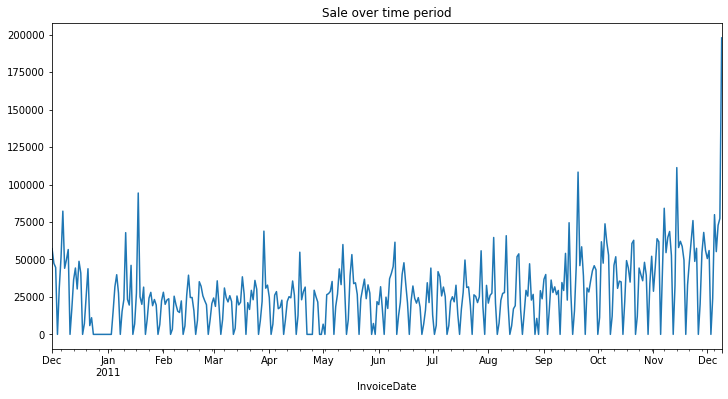

In [0]:
#Trend over time
plt.figure(figsize=(12, 6))
plt.title("Sale over time period")

retails_df_indexed['TotalPrice'].resample('d').sum().plot()

plt.show()

* We can see Spikes in August an increase in sales g from seotember mid. This might be due to the preparation for christmas season. 
*  Also we could see few sales which is round to zero during Dec end 2010.

In [0]:
#Mx total price entry
retails_df_indexed.query(f'TotalPrice=={max(retails_df_indexed.TotalPrice)}')

,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceNo,StockCode,TotalPrice
InvoiceDate,,,,,,,,
2011-12-09 09:15:00,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,United Kingdom,581483,23843,168469.6


This seems to an error value as we have seen before the cancellation of this bulk order, so we can go ahead an remove this entry.

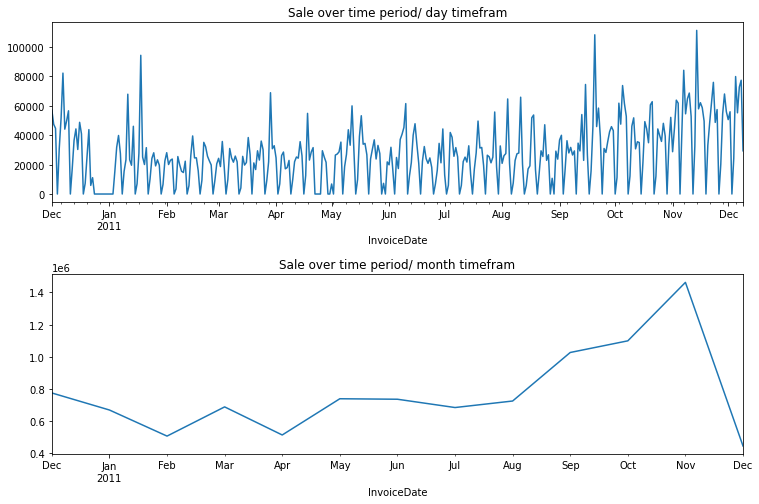

In [0]:
#Remove above row
retails_df_indexed = retails_df_indexed[retails_df_indexed['Quantity']!=80995]

#Trend over day over time after droppig max value
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title("Sale over time period/ day timefram")
retails_df_indexed['TotalPrice'].resample('d').sum().plot()

print("\n")

plt.subplot(2, 1, 2)
plt.title("Sale over time period/ month timefram")
retails_df_indexed['TotalPrice'].resample('m').sum().plot()

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=0.9, 
                    top=1, 
                    wspace=0.5, 
                    hspace=0.4)

plt.show()

We have the most Sales in November and least in Feb, April

Check for the Lower value in december end

In [0]:
#Check min values items
retails_df_indexed.query('TotalPrice<0.5')

,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceNo,StockCode,TotalPrice
InvoiceDate,,,,,,,,
2010-12-01 11:45:00,MAGIC DRAWING SLATE CIRCUS PARADE,1,0.42,17908.0,United Kingdom,536409,22531,0.42
2010-12-01 12:23:00,PACK OF 12 HEARTS DESIGN TISSUES,1,0.29,17968.0,United Kingdom,536464,21985,0.29
2010-12-01 12:23:00,PACK OF 12 RED RETROSPOT TISSUES,1,0.29,17968.0,United Kingdom,536464,21980,0.29
2010-12-01 12:23:00,SWIRLY CIRCULAR RUBBERS IN BAG,1,0.42,17968.0,United Kingdom,536464,16258A,0.42
2010-12-01 12:49:00,PLACE SETTING WHITE HEART,1,0.42,15012.0,United Kingdom,536522,22151,0.42
...,...,...,...,...,...,...,...,...
2011-12-09 11:34:00,BLACK PIRATE TREASURE CHEST,1,0.39,14446.0,United Kingdom,581538,22068,0.39
2011-12-09 11:34:00,LADS ONLY TISSUE BOX,1,0.39,14446.0,United Kingdom,581538,22095,0.39
2011-12-09 11:34:00,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",1,0.39,14446.0,United Kingdom,581538,85071C,0.39


Lets try to decompose the trend


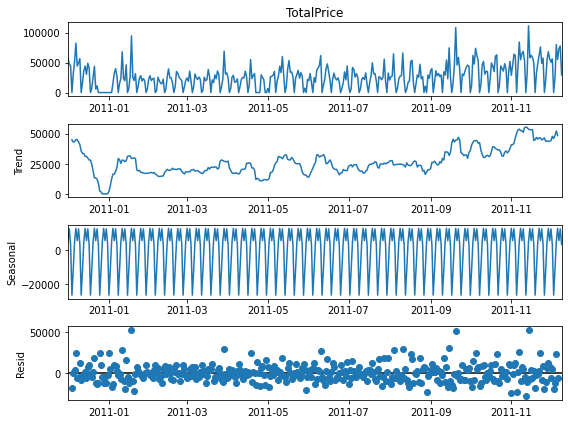

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

#decompose 
resplot = seasonal_decompose(retails_df_indexed['TotalPrice'].resample('d').sum(), 
                   model='additive')

res = resplot.plot()

We can clearly see a trend durung the september - December season... with a good seasonality

In [0]:
#which day of the week has max and min sales.
week_series = pd.to_datetime(retails_df_indexed.reset_index()['InvoiceDate']).apply(lambda x: x.strftime('%A'))

retails_df_indexed['Weekdays'] = week_series.tolist()

retails_df_indexed.groupby('Weekdays')['TotalPrice'].sum()

Out[45]: Weekdays
Friday       1606245.382
Monday       1678886.340
Sunday        795753.000
Thursday     2130572.822
Tuesday      2083913.596
Wednesday    1778341.550
Name: TotalPrice, dtype: float64

From the above feild we can see that there were no sales happened on Saturdays. The least sale has happened on Sundays. The max sales was recorded on Thursday. Theres a seasonality within week with a high sales during mid week and low sales during weekends.

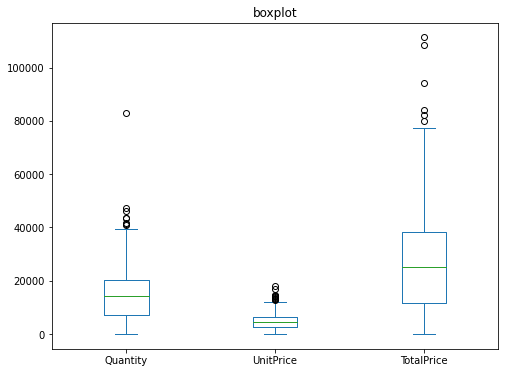

In [0]:
#Lets take a look at the boxplots of perday sales
ax = retails_df_indexed[['Quantity', "UnitPrice", 
                         'TotalPrice']].resample('d').sum().plot(kind='box', title='boxplot')

plt.show()

Seems like the data has a few of outlier values, which actually has some information

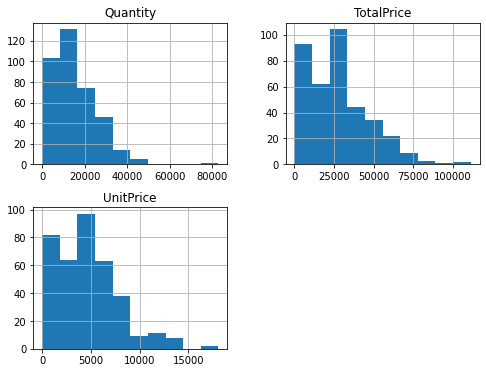

In [0]:
#Distribution of Data
retails_df_indexed.resample('d').sum()[['Quantity', 'TotalPrice', "UnitPrice"]].hist()

plt.show()

Thea above data is right skewed. 

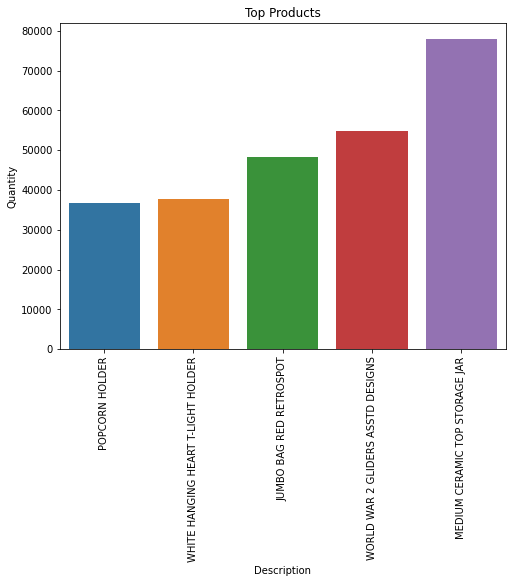

In [0]:
#Top Selling Products
product_sold_counts = pd.DataFrame(retails_df_indexed.groupby('Description')['Quantity'].sum())
product_sold_counts = product_sold_counts.sort_values(by='Quantity')

top_product = product_sold_counts.reset_index()['Description'][-5:]
qty = product_sold_counts.reset_index()['Quantity'][-5:]

sns.barplot(x=top_product, 
            y=qty)

plt.xticks(rotation=90)

plt.title("Top Products")

plt.show()

The top selling products are MEDIUM CERAMIC TOP STORAGE JAR	, WORLD WAR 2 GLIDERS ASSTD DESIGNS	

In [0]:
#Top Profitable Product
profit_items = pd.DataFrame(retails_df_indexed.groupby('Description')[['Quantity', 'TotalPrice']].sum())

profit_items.sort_values(by=['TotalPrice', 'Quantity'])

,Quantity,TotalPrice
Description,,
HEN HOUSE W CHICK IN NEST,1,0.42
SET 12 COLOURING PENCILS DOILEY,1,0.65
VINTAGE BLUE TINSEL REEL,2,0.84
PINK CRYSTAL GUITAR PHONE CHARM,1,0.85
CAT WITH SUNGLASSES BLANK CARD,5,0.95
...,...,...
MEDIUM CERAMIC TOP STORAGE JAR,78030,81697.17
JUMBO BAG RED RETROSPOT,48359,94139.73
PARTY BUNTING,18282,99459.27


The most Profitable item is REGENCY CAKESTAND 3 TIER	with a total sold price of 174405.

In [0]:
#Top Customer Country
top_contries = pd.DataFrame(retails_df_indexed.groupby('Country')['TotalPrice'].count())

top_contries.sort_values(by=['TotalPrice'])

,TotalPrice
Country,
Saudi Arabia,9
Bahrain,17
Czech Republic,24
Brazil,31
Lithuania,34
Lebanon,45
European Community,57
RSA,57
United Arab Emirates,67


Apart from the home country UK, Germany contributes to the most sale.

In [0]:
#update the dataframe
retails_df = retails_df_indexed.reset_index()

retails_df.head()

,InvoiceDate,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceNo,StockCode,TotalPrice,Weekdays
0,2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,536365,85123A,15.30,Wednesday
1,2010-12-01 08:26:00,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,536365,71053,20.34,Wednesday
2,2010-12-01 08:26:00,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,536365,84406B,22.00,Wednesday
3,2010-12-01 08:26:00,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,536365,84029G,20.34,Wednesday
4,2010-12-01 08:26:00,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,536365,84029E,20.34,Wednesday


### Customer Insights

To gert more insights on the customer, we can do RFM analysis to find out the recency, frequency and monetary.

In [0]:
#Add index column
index = [i for i in range(0, len(retails_df_indexed))]

retails_df_indexed['Index'] = index

retails_df_indexed.head()

,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceNo,StockCode,TotalPrice,Weekdays,Index
InvoiceDate,,,,,,,,,,
2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,536365,85123A,15.30,Wednesday,0
2010-12-01 08:26:00,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,536365,71053,20.34,Wednesday,1
2010-12-01 08:26:00,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,536365,84406B,22.00,Wednesday,2
2010-12-01 08:26:00,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,536365,84029G,20.34,Wednesday,3
2010-12-01 08:26:00,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,536365,84029E,20.34,Wednesday,4


#### Recency

In [0]:
#Recency of the customer
customer_recency_df = retails_df.groupby(by='CustomerID', 
                                              as_index=False)['InvoiceDate'].max()

customer_recency_df.columns = ['CustomerID', 'LastDate']
recent_date = customer_recency_df['LastDate'].max()

customer_recency_df['Recency'] = customer_recency_df['LastDate'].apply(
    lambda x: (recent_date - x).days)

customer_recency_df

,CustomerID,LastDate,Recency
0,11122.0,2011-11-10 12:16:00,29
1,11184.0,2011-01-17 17:48:00,325
2,11221.0,2011-04-15 10:38:00,238
3,11496.0,2011-06-28 14:01:00,163
4,11544.0,2011-03-15 14:18:00,268
...,...,...,...
5244,99581.0,2010-12-09 16:35:00,364
5245,99777.0,2011-06-13 10:45:00,179
5246,99791.0,2011-06-20 09:41:00,172
5247,99894.0,2011-09-02 15:16:00,97


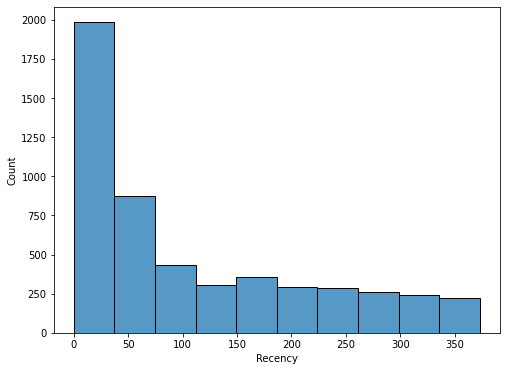

In [0]:
#Histogram foir recency
sns.histplot(customer_recency_df['Recency'], 
             bins=10)

plt.show()

Lets take a look at the the recency of purcjhase of the customer. It makes sense that the custromer who made a purchase recently has less of a chance to order again any soon..

In [0]:
print(len(customer_recency_df.query('Recency>90'))/len(customer_recency_df))

customer_recency_df.query('Recency>90')

0.4132215660125738


,CustomerID,LastDate,Recency
1,11184.0,2011-01-17 17:48:00,325
2,11221.0,2011-04-15 10:38:00,238
3,11496.0,2011-06-28 14:01:00,163
4,11544.0,2011-03-15 14:18:00,268
5,11587.0,2011-03-29 13:44:00,254
...,...,...,...
5244,99581.0,2010-12-09 16:35:00,364
5245,99777.0,2011-06-13 10:45:00,179
5246,99791.0,2011-06-20 09:41:00,172
5247,99894.0,2011-09-02 15:16:00,97


40 percentage of the customers havent made any transactions for more than last 3 months. Focus on these customers.

#### Frequency

In [0]:
#Purchasre Frequrncy of the customer
customer_frequency_df = retails_df_indexed[['CustomerID']].reset_index()
customer_frequency_df['InvoiceDate'] = customer_frequency_df['InvoiceDate'].apply( 
                                                                lambda x: x.strftime('%y-%m-%d')
                                                                )

customer_frequency_df.groupby(by=['CustomerID'], as_index=False)['InvoiceDate'].count().sort_values(by='InvoiceDate', ascending=False)

,CustomerID,InvoiceDate
4033,17841.0,7663
1898,14911.0,5576
1306,14096.0,5093
338,12748.0,4395
1679,14606.0,2669
...,...,...
2353,15524.0,1
4213,18087.0,1
380,12814.0,1
2010,15070.0,1


The most active customer is 17841.0

In [0]:
#Total days purchasde done
total_purch_days = customer_frequency_df.drop_duplicates(keep='first', 
                                                              ignore_index=True)

total_purch_days = pd.DataFrame(total_purch_days['CustomerID'].value_counts()).reset_index()
total_purch_days.columns = ['CustomerID', 'Frequency']

total_purch_days

,CustomerID,Frequency
0,14911.0,130
1,12748.0,113
2,17841.0,112
3,15311.0,90
4,14606.0,88
...,...,...
5244,28725.0,1
5245,13300.0,1
5246,12929.0,1
5247,13494.0,1


Fro the above, we can see that 14911 has done purchases on 130 differnet days.. 



Lets try to find the interval betrween consecutive purchases of customers

In [0]:
#Average purchase interaval
average_purchase = customer_frequency_df.drop_duplicates(keep='first', 
                                                              ignore_index=True)

average_purchase['InvoiceDate'] = average_purchase['InvoiceDate'].apply( 
                                    lambda x: datetime.strptime(x,
                                                               '%y-%m-%d'
                                                              )
                                    )
average_purchase = average_purchase.merge(average_purchase, 
                       on='CustomerID')

average_purchase['difference'] = average_purchase['InvoiceDate_y'] - average_purchase['InvoiceDate_x']
average_purchase['difference'] = average_purchase['difference'].dt.days
average_purchase = average_purchase.query('difference>0')

average_purchase = average_purchase.groupby('CustomerID')['difference'].median().reset_index()

average_purchase

,CustomerID,difference
0,12347.0,144.0
1,12348.0,141.5
2,12352.0,187.0
3,12356.0,223.0
4,12358.0,149.0
...,...,...
2770,18272.0,111.0
2771,18273.0,162.0
2772,18282.0,119.0
2773,18283.0,137.0


Average Interval for customer Purchase is  116.19166666666666


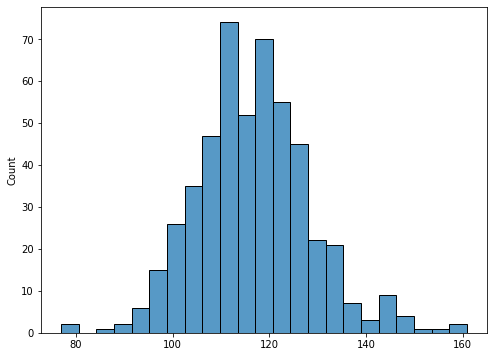

In [0]:
#Central Limit Therorm
mean = []

def central_limit(sample_size, no_of_sample_means):
    for i in range(no_of_sample_means):        
        central_average = average_purchase['difference'].sample(n=sample_size)
        central_average=central_average.mean()
        mean.append(central_average)

    return mean

sample_mean = central_limit(30, 500)

sns.histplot(sample_mean)

print("Average Interval for customer Purchase is ", pd.Series(sample_mean).median())

#### Monetary

In [0]:
monetary_df = retails_df_indexed.groupby(by='CustomerID', as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice')
monetary_df.columns = ['CustomerID', 'Monetary']

monetary_df

,CustomerID,Monetary
3030,16446.0,2.90
3240,16738.0,3.75
3036,16454.0,5.90
1811,14792.0,6.20
5116,87814.0,12.30
...,...,...
67,12415.0,126411.97
1898,14911.0,137134.88
3751,17450.0,194390.79
4223,18102.0,259657.30


Average Price spent  699.8
80th percentilce Price spent  2064.5840000000003


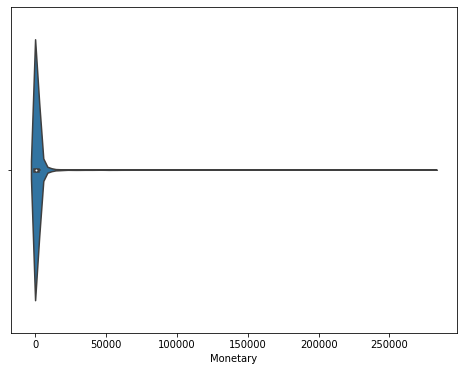

In [0]:
sns.violinplot(monetary_df['Monetary'])

print("Average Price spent ", monetary_df['Monetary'].median())
print("80th percentilce Price spent ", np.percentile(monetary_df['Monetary'], 80))

The Top Customer in terms of Monetary alon was 14646. 
The avergae price spent was 700 $ AND 80 percentage of customer has spend around 2060 $.

#### RFM Ranking

In [0]:
#RFM Dataframe
rf_df = customer_recency_df.merge(total_purch_days, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(columns=['LastDate'])

rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,11122.0,29,1,83.800
1,11184.0,325,1,2259.930
2,11221.0,238,1,432.490
3,11496.0,163,1,304.124
4,11544.0,268,1,497.260


In [0]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)

rfm_df[['CustomerID', 'RFM_Score']].sort_values('RFM_Score', ascending=False)

,CustomerID,RFM_Score
2195,15311.0,5.00
1898,14911.0,5.00
338,12748.0,5.00
1679,14606.0,5.00
1086,13798.0,4.99
...,...,...
1054,13747.0,1.00
2225,15350.0,1.00
4160,18011.0,1.00
4202,18074.0,1.00


In [0]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers", 
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6, 
                            'Low Value Customers', 'Lost Customers'))))))

rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].sort_values('RFM_Score', ascending=False)

,CustomerID,RFM_Score,Customer_segment
2195,15311.0,5.00,Top Customers
1898,14911.0,5.00,Top Customers
338,12748.0,5.00,Top Customers
1679,14606.0,5.00,Top Customers
1086,13798.0,4.99,Top Customers
...,...,...,...
1054,13747.0,1.00,Lost Customers
2225,15350.0,1.00,Lost Customers
4160,18011.0,1.00,Lost Customers
4202,18074.0,1.00,Lost Customers


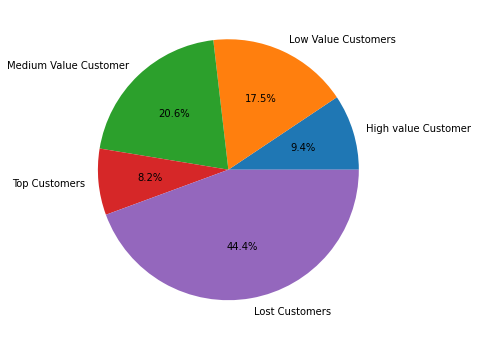

In [0]:
customer_segment = []
label = []
for i in set(rfm_df['Customer_segment']):
    customer_segment.append(len(rfm_df.query(f"Customer_segment=='{i}'"))/5249)
    label.append(i)
\
plt.pie(x=customer_segment, labels=label, autopct='%1.1f%%')

plt.show()

### One Step Forecasting

Using the t-1 features to preddcit t feature.

In [0]:
retails_df_indexed

,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceNo,StockCode,TotalPrice,Weekdays,Index
InvoiceDate,,,,,,,,,,
2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,536365,85123A,15.30,Wednesday,0
2010-12-01 08:26:00,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,536365,71053,20.34,Wednesday,1
2010-12-01 08:26:00,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,536365,84406B,22.00,Wednesday,2
2010-12-01 08:26:00,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,536365,84029G,20.34,Wednesday,3
2010-12-01 08:26:00,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,536365,84029E,20.34,Wednesday,4
...,...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,581587,22613,10.20,Friday,521189
2011-12-09 12:50:00,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,581587,22899,12.60,Friday,521190
2011-12-09 12:50:00,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,581587,23254,16.60,Friday,521191


#### Data Preparation

We will be using supervised machine learning modelsfor forecasting.. We need to do the necessary data preperations for that.

In [0]:
#Covert the time series to day-wise
daily_retails_df = retails_df_indexed.resample('d').sum().reset_index()\
    .drop(columns=['Index'])

daily_retails_df

,InvoiceDate,Quantity,UnitPrice,CustomerID,TotalPrice
0,2010-12-01,26770,11302.94,121537529.0,57181.82
1,2010-12-02,31228,6469.74,34408620.0,47423.12
2,2010-12-03,16077,8999.86,80532812.0,44650.91
3,2010-12-04,0,0.00,0.0,0.00
4,2010-12-05,16148,7388.77,39378946.0,30824.02
...,...,...,...,...,...
369,2011-12-05,43634,18088.56,153401242.0,79888.03
370,2011-12-06,30334,8870.39,64554120.0,55218.51
371,2011-12-07,41748,6469.16,50942205.0,72739.78
372,2011-12-08,34949,16839.87,206002991.0,77386.35


#### Base model Creation

Lets create a baseline model using just 1 lag and Total Price Feature alone

In [0]:
base_features = ['InvoiceDate', 'TotalPrice']
base_feature_df = daily_retails_df[base_features]

base_feature_df['InvoiceDate'] = pd.to_numeric(pd.to_datetime(base_feature_df['InvoiceDate']))
base_feature_df = base_feature_df.set_index('InvoiceDate')

base_feature_df

,TotalPrice
InvoiceDate,
1291161600000000000,57181.82
1291248000000000000,47423.12
1291334400000000000,44650.91
1291420800000000000,0.00
1291507200000000000,30824.02
...,...
1323043200000000000,79888.03
1323129600000000000,55218.51
1323216000000000000,72739.78


Next, we need to convert the time series data into a supervised learning dataset

In [0]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

values = base_feature_df.values
data = series_to_supervised(values, n_in=1)

data

,var1(t-1),var1(t)
1,57181.82,47423.12
2,47423.12,44650.91
3,44650.91,0.00
4,0.00,30824.02
5,30824.02,51605.25
...,...,...
369,24235.52,79888.03
370,79888.03,55218.51
371,55218.51,72739.78
372,72739.78,77386.35


After research, it was foundthat Tree based models work best on Time series forecasting. Therefore consoidering Random Forest model./



In [0]:
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = np.asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=1000)
 
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, test_size=n_test, shuffle=False)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

>expected=54429.4, predicted=10492.1
>expected=68028.2, predicted=48974.3
>expected=56015.8, predicted=31170.0
>expected=50601.9, predicted=17562.6
>expected=55943.6, predicted=50419.6
>expected=0.0, predicted=36850.2
>expected=24235.5, predicted=13213.5
>expected=79888.0, predicted=26315.7
>expected=55218.5, predicted=45460.5
>expected=72739.8, predicted=26278.1
>expected=77386.4, predicted=50222.1
>expected=29385.9, predicted=49623.6
MAE: 27622.205


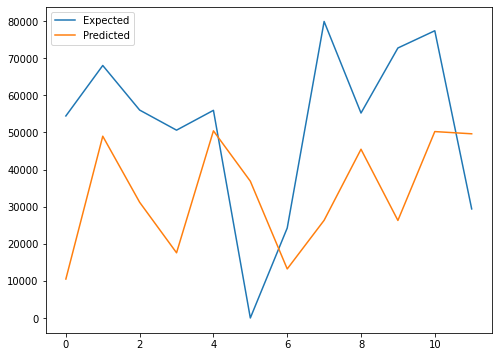

In [0]:
# evaluate
mae, y, yhat = walk_forward_validation(np.array(data), 12)

print('MAE: %.3f' % mae)
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

Seems like with one feeature alone, we were able to capture a lot of the seasonality and trend. 

 we can see that even though the model is able to predict the seasonality and trend it is not able to accurately capture the magnitude. To solve this we might need to add extra features and do some hyoerparameter tuning.

#### Model Updation

##### Feature Extraction
In our baseline model, we only created a single lag feature, now , we are going to add few more lags, for 7 days and also extract the day anbd month feature to precisely capture thr trend by the moidel..

In [0]:
#base features
base_features = ['InvoiceDate', 'TotalPrice']
daily_retails_df_upd = daily_retails_df[base_features]

daily_retails_df_upd['InvoiceDate'] = pd.to_numeric(
    pd.to_datetime(daily_retails_df_upd['InvoiceDate']))

#Extract week and month
week_series = pd.to_datetime(daily_retails_df_upd['InvoiceDate']).apply(
    lambda x: x.weekday())
month_series = pd.to_datetime(daily_retails_df_upd['InvoiceDate']).apply(
    lambda x: x.strftime('%m'))
daily_retails_df_upd['Weekdays'] = week_series.tolist()
daily_retails_df_upd['Month'] = month_series.to_list()

daily_retails_df_upd = daily_retails_df_upd.set_index('InvoiceDate')

daily_retails_df_upd

,TotalPrice,Weekdays,Month
InvoiceDate,,,
1291161600000000000,57181.82,2,12
1291248000000000000,47423.12,3,12
1291334400000000000,44650.91,4,12
1291420800000000000,0.00,5,12
1291507200000000000,30824.02,6,12
...,...,...,...
1323043200000000000,79888.03,0,12
1323129600000000000,55218.51,1,12
1323216000000000000,72739.78,2,12


In [0]:
#Add 7 DAYS LAG
values = daily_retails_df_upd.values
data = series_to_supervised(values, n_in=7)
data = data.iloc[:, :-2]

data

,var1(t-7),var2(t-7),var3(t-7),var1(t-6),var2(t-6),var3(t-6),var1(t-5),var2(t-5),var3(t-5),var1(t-4),...,var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t)
7,57181.82,2,12,47423.12,3,12,44650.91,4,12,0.0,...,30824.02,6,12,51605.25,0,12,82232.238,1,12,44099.58
8,47423.12,3,12,44650.91,4,12,0.0,5,12,30824.02,...,51605.25,0,12,82232.238,1,12,44099.58,2,12,49818.2
9,44650.91,4,12,0.0,5,12,30824.02,6,12,51605.25,...,82232.238,1,12,44099.58,2,12,49818.2,3,12,56606.6
10,0.0,5,12,30824.02,6,12,51605.25,0,12,82232.238,...,44099.58,2,12,49818.2,3,12,56606.6,4,12,0.0
11,30824.02,6,12,51605.25,0,12,82232.238,1,12,44099.58,...,49818.2,3,12,56606.6,4,12,0.0,5,12,17090.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,54429.43,0,11,68028.18,1,11,56015.84,2,11,50601.86,...,55943.58,4,12,0.0,5,12,24235.52,6,12,79888.03
370,68028.18,1,11,56015.84,2,11,50601.86,3,12,55943.58,...,0.0,5,12,24235.52,6,12,79888.03,0,12,55218.51
371,56015.84,2,11,50601.86,3,12,55943.58,4,12,0.0,...,24235.52,6,12,79888.03,0,12,55218.51,1,12,72739.78
372,50601.86,3,12,55943.58,4,12,0.0,5,12,24235.52,...,79888.03,0,12,55218.51,1,12,72739.78,2,12,77386.35


>expected=54429.4, predicted=65368.5
>expected=68028.2, predicted=54293.3
>expected=56015.8, predicted=55857.7
>expected=50601.9, predicted=59872.8
>expected=55943.6, predicted=54841.5
>expected=0.0, predicted=0.0
>expected=24235.5, predicted=22474.0
>expected=79888.0, predicted=46322.3
>expected=55218.5, predicted=55321.3
>expected=72739.8, predicted=52591.5
>expected=77386.4, predicted=55188.0
>expected=29385.9, predicted=54574.7
MAE: 11514.226


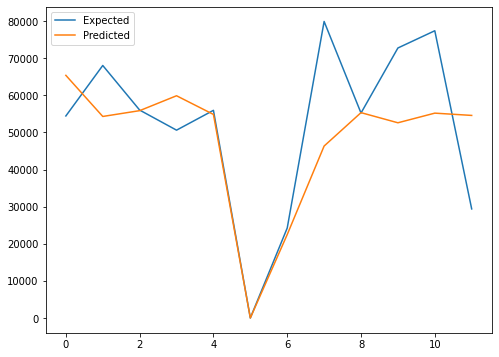

In [0]:
# evaluate
mae, y, yhat = walk_forward_validation(np.array(data), 12)

print('MAE: %.3f' % mae)
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

Initially the MAE was around 28000, now we have reduced it to 11500 by adding new fewatures and adding lag components..
Till now we have only done the prediction for the time steps we have and have done the evaluation. Now bnased on the above trained model lets forecast the futuure values for 7 days. For that we need to make the input data.

##### Forecast for next 7 days

In [0]:
#Add 7 DAYS LAG
values = daily_retails_df_upd.values
data = series_to_supervised(values, n_in=7)
data = data.iloc[:, :-2]

data.reset_index(drop=True, inplace=True)

data

,var1(t-7),var2(t-7),var3(t-7),var1(t-6),var2(t-6),var3(t-6),var1(t-5),var2(t-5),var3(t-5),var1(t-4),...,var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t)
0,57181.82,2,12,47423.12,3,12,44650.91,4,12,0.0,...,30824.02,6,12,51605.25,0,12,82232.238,1,12,44099.58
1,47423.12,3,12,44650.91,4,12,0.0,5,12,30824.02,...,51605.25,0,12,82232.238,1,12,44099.58,2,12,49818.2
2,44650.91,4,12,0.0,5,12,30824.02,6,12,51605.25,...,82232.238,1,12,44099.58,2,12,49818.2,3,12,56606.6
3,0.0,5,12,30824.02,6,12,51605.25,0,12,82232.238,...,44099.58,2,12,49818.2,3,12,56606.6,4,12,0.0
4,30824.02,6,12,51605.25,0,12,82232.238,1,12,44099.58,...,49818.2,3,12,56606.6,4,12,0.0,5,12,17090.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,54429.43,0,11,68028.18,1,11,56015.84,2,11,50601.86,...,55943.58,4,12,0.0,5,12,24235.52,6,12,79888.03
363,68028.18,1,11,56015.84,2,11,50601.86,3,12,55943.58,...,0.0,5,12,24235.52,6,12,79888.03,0,12,55218.51
364,56015.84,2,11,50601.86,3,12,55943.58,4,12,0.0,...,24235.52,6,12,79888.03,0,12,55218.51,1,12,72739.78
365,50601.86,3,12,55943.58,4,12,0.0,5,12,24235.52,...,79888.03,0,12,55218.51,1,12,72739.78,2,12,77386.35


In [0]:
#Function to train the model with walk validation
def train_model(model, data, test_size):
    X_train, y_train = data.iloc[:-test_size, :-1], data.iloc[:-test_size, -1]
    X_test, y_test = data.iloc[-test_size:, :-1], data.iloc[-test_size:, -1]
    
    predictions = []

    for i in range(0, test_size):
        model.fit(X_train, y_train)

        prediction = model.predict(np.array(X_test.iloc[i, :]).reshape(1, -1))
        predictions.append(round(prediction[0], 2))

        X_train = X_train.append(X_test.iloc[i, :])
        y_train = y_train.append(pd.Series(y_test.iloc[i]))

        print("Expected: ", y_test.iloc[i])
        print("Predicted: ", prediction[0])

        print('X_train Size = ', X_train.shape)
        print('y_train Size = ', y_train.shape)
        print('X_test Size = ', X_test.shape)
        print('y_test Size = ', y_test.shape, '\n\n')

    mae = mean_absolute_error(y_test, predictions)
    print("Mean Absolute Error: ", mae)

    return model, predictions

#Train and and evaluate
model = RandomForestRegressor(n_estimators=1000)
model, predictions = train_model(model, data, 12)   #Predict for 12 days and eval

Expected:  54429.43
Predicted:  66801.53031800012
X_train Size =  (356, 21)
y_train Size =  (356,)
X_test Size =  (12, 21)
y_test Size =  (12,) 


Expected:  68028.18
Predicted:  54681.163654000055
X_train Size =  (357, 21)
y_train Size =  (357,)
X_test Size =  (12, 21)
y_test Size =  (12,) 


Expected:  56015.84
Predicted:  55779.95694199998
X_train Size =  (358, 21)
y_train Size =  (358,)
X_test Size =  (12, 21)
y_test Size =  (12,) 


Expected:  50601.86
Predicted:  60049.255866000094
X_train Size =  (359, 21)
y_train Size =  (359,)
X_test Size =  (12, 21)
y_test Size =  (12,) 


Expected:  55943.58
Predicted:  55078.63507000021
X_train Size =  (360, 21)
y_train Size =  (360,)
X_test Size =  (12, 21)
y_test Size =  (12,) 


Expected:  0.0
Predicted:  0.0
X_train Size =  (361, 21)
y_train Size =  (361,)
X_test Size =  (12, 21)
y_test Size =  (12,) 


Expected:  24235.52
Predicted:  22604.82675999998
X_train Size =  (362, 21)
y_train Size =  (362,)
X_test Size =  (12, 21)
y_test Size 

In [0]:
#Create updated Prediction colum
forecast_data_df = data.copy()

forecast_data_df['Prediction'] = forecast_data_df['var1(t)']

#Changing last 12 days value to predicted value from above step
forecast_data_df.iloc[-12: , -1] = list(predictions)
forecast_data_df = forecast_data_df.drop(columns=['var1(t)'])

forecast_data_df.reset_index(drop=True, inplace=True)

forecast_data_df

,var1(t-7),var2(t-7),var3(t-7),var1(t-6),var2(t-6),var3(t-6),var1(t-5),var2(t-5),var3(t-5),var1(t-4),...,var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),Prediction
0,57181.82,2,12,47423.12,3,12,44650.91,4,12,0.0,...,30824.02,6,12,51605.25,0,12,82232.238,1,12,44099.58
1,47423.12,3,12,44650.91,4,12,0.0,5,12,30824.02,...,51605.25,0,12,82232.238,1,12,44099.58,2,12,49818.2
2,44650.91,4,12,0.0,5,12,30824.02,6,12,51605.25,...,82232.238,1,12,44099.58,2,12,49818.2,3,12,56606.6
3,0.0,5,12,30824.02,6,12,51605.25,0,12,82232.238,...,44099.58,2,12,49818.2,3,12,56606.6,4,12,0.0
4,30824.02,6,12,51605.25,0,12,82232.238,1,12,44099.58,...,49818.2,3,12,56606.6,4,12,0.0,5,12,17090.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,54429.43,0,11,68028.18,1,11,56015.84,2,11,50601.86,...,55943.58,4,12,0.0,5,12,24235.52,6,12,47049.73
363,68028.18,1,11,56015.84,2,11,50601.86,3,12,55943.58,...,0.0,5,12,24235.52,6,12,79888.03,0,12,56104.71
364,56015.84,2,11,50601.86,3,12,55943.58,4,12,0.0,...,24235.52,6,12,79888.03,0,12,55218.51,1,12,53521.08
365,50601.86,3,12,55943.58,4,12,0.0,5,12,24235.52,...,79888.03,0,12,55218.51,1,12,72739.78,2,12,54676.6


In [0]:
#Function to forecast for x days
def forecast_next_days(data, days=7):

    #Function to create new rows for prediction
    def create_and_predict(data):

        #create input for forecasting
        day = data.loc[len(data)-1, 'var2(t-1)']

        #Shift and add new rows
        for i in range(0, days):
            day = int((day + 1) % 7)
            row_data = list(data.iloc[-1, 3:-1])
            row_data.extend([data.iloc[-1, -1], day, int(12), np.nan])

            data.loc[len(data)] = row_data

            #Last row for prediction 
            X_in = np.array(data.iloc[-1, :-1]).reshape(1, -1)
            data.iloc[-1, -1] = model.predict(X_in)[0]      #Predict

        return data
    
    return create_and_predict(data)

forecast_data_df = forecast_next_days(forecast_data_df)

forecast_data_df

,var1(t-7),var2(t-7),var3(t-7),var1(t-6),var2(t-6),var3(t-6),var1(t-5),var2(t-5),var3(t-5),var1(t-4),...,var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),Prediction
0,57181.82,2,12,47423.12,3,12,44650.91,4,12,0.0,...,30824.02,6,12,51605.25,0,12,82232.238,1,12,44099.58
1,47423.12,3,12,44650.91,4,12,0.0,5,12,30824.02,...,51605.25,0,12,82232.238,1,12,44099.58,2,12,49818.2
2,44650.91,4,12,0.0,5,12,30824.02,6,12,51605.25,...,82232.238,1,12,44099.58,2,12,49818.2,3,12,56606.6
3,0.0,5,12,30824.02,6,12,51605.25,0,12,82232.238,...,44099.58,2,12,49818.2,3,12,56606.6,4,12,0.0
4,30824.02,6,12,51605.25,0,12,82232.238,1,12,44099.58,...,49818.2,3,12,56606.6,4,12,0.0,5,12,17090.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,79888.03,0,12,55218.51,1,12,72739.78,2,12,77386.35,...,54437.01,4,12,0.0,5,12,23522.95515,6,12,78269.178406
370,55218.51,1,12,72739.78,2,12,77386.35,3,12,54437.01,...,0.0,5,12,23522.95515,6,12,78269.178406,0,12,77317.543012
371,72739.78,2,12,77386.35,3,12,54437.01,4,12,0.0,...,23522.95515,6,12,78269.178406,0,12,77317.543012,1,12,60274.948592
372,77386.35,3,12,54437.01,4,12,0.0,5,12,23522.95515,...,78269.178406,0,12,77317.543012,1,12,60274.948592,2,12,63579.339578


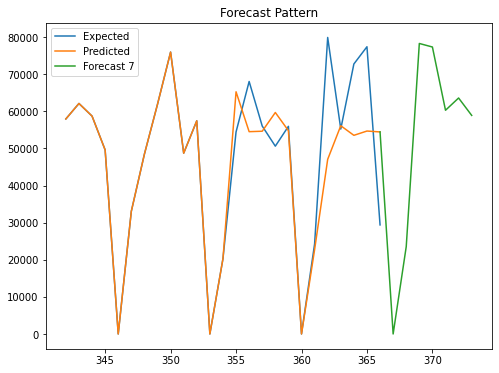

In [0]:
#Plot graph 
plt.title("Forecast Pattern")

plt.plot(data['var1(t)'][-25:], label="Expected")
plt.plot(forecast_data_df['Prediction'][-32:-7], label="Predicted")
plt.plot(forecast_data_df['Prediction'][-8:], label="Forecast 7")
plt.legend()

plt.show()

Here we have plotted the graphs where we hjave the real data values, the predicted ones and the forecasting for next 7 days. From the plot we can see than, the model has learned very good from the few data that was available in our hand. 

Further experiments which can be done are:
* Try to get more data
* Try hyperparameter tuning using Grid search, Randiom search etc,
* Try using other models, HistGradientBoosting, Prophet ..